## Testing notebook showing basic functionality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from calc_utils import kml_to_shp, load_shp, normalize_shps, shp_to_land, plot_land, observations_to_circles, expand_observations, \
                       daily_score_union, daily_attibution, monthly_attribution, cummulative_attribution, daily_video, create_value_lands, plot_value_lands

In [2]:
# transform plots kml to shp
kml_to_shp(source_directory='test_data/KML/', destination_directory='test_data/SHP/', original_shp_directory=None)
land_metadata = pd.read_csv('test_data/land_metadata.csv', dtype={'plot_id': str})

########## Converting 3 ##########
Converted 3.kml to 3.shp
########## Converting 18 ##########
Converted 18.kml to 18.shp
########## Converting 9 ##########
Converted 9.kml to 9.shp


Warning 6: Normalized/laundered field name: 'description' to 'descriptio'
Warning 1: The output driver does not natively support DateTime type for field timestamp. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field timestamp create as date field, though DateTime requested.
Warning 1: The output driver does not natively support DateTime type for field begin. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field begin create as date field, though DateTime requested.
Warning 1: The output driver does not natively support DateTime type for field end. Misconversion can happen. -mapFieldType can be used to control field type conversion.
Warning 6: Field end create as date field, though DateTime requested.
Warning 6: Normalized/laundered field name: 'altitudeMode' to 'altitudeMo'
ERROR 1: Attempt to write non-point (POLYGON) geometry to point shapefile.
ERROR 1: Unable to write feature 14 from

In [3]:
# loading shp files
shp = load_shp('test_data/SHP/')
# some preprocessing of shps
normalized_shapes = normalize_shps(shp)
plots = shp_to_land(normalized_shapes)
plots = plots.reset_index()
plots['plot_id'] = plots['index'].astype(str).str.zfill(3)
plots = plots.merge(land_metadata, on='plot_id', how='left')

subtypes = load_shp('credit_subtypes/SHP/')
platinum = subtypes['Tropical Andes']['geometry'][0]
plots, platinum_gdf = create_value_lands(plots, platinum)
# creating html map
plot_value_lands(plots, platinum_gdf, filename='test_plots_value.html')
print('You can see the map at test_plots.html')
plots.head()

Geometry type Point found in plots: 18, 3, 9
CRS found in plots: EPSG:4326: 3
Total plots processed: 3
You can see the map at test_plots.html


index  total_area plot_id  POD  project_biodiversity  area_certifier  \
0    18  142.034201      18  NaN                   NaN             NaN   
1     3   64.834050       3  NaN                   NaN             NaN   
2     9   10.096988       9  NaN                   NaN             NaN   
3     9   10.096988       9  NaN                   NaN             NaN   

                                            geometry     value  
0  POLYGON Z ((-76.79334 0.87410 0.00000, -76.787...  platinum  
1  POLYGON Z ((-76.78710 0.88356 0.00000, -76.781...  platinum  
2  POLYGON Z ((-76.75636 0.88951 0.00000, -76.757...  platinum  
3  POLYGON Z ((-76.75475 0.89361 0.00000, -76.754...      gold

In [5]:
# loading observations
records = pd.read_csv('test_data/observations.csv')
print('Number of test observations: ', len(records))
records.head()

Number of test observations:  48


eco_id    eco_date  species_id        name_common             name_latin  \
0   11369  2023-11-30          22  rec4OhXboLvO3936j         Panthera onca    
1   11136  2023-11-18         592  recUOMlBGkJ0ngdp1  Minquartia guianensis   
2   10897  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   
3   10905  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   
4   10896  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   

   radius  score      lat      long  \
0      11    1.0  0.87029 -76.79010   
1       2    0.5  0.89400 -76.75440   
2       6    0.5  0.89115 -76.75542   
3       6    0.5  0.89280 -76.75530   
4       6    0.5  0.89102 -76.75514   

                                         iNaturalist  
0  https://www.inaturalist.org/observations/19457...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [6]:
# from observations to circles
# crs for observations is 4326 because it is lat/lon
# crs for circles is 6262 because it is in meters
records = observations_to_circles(records, default_crs=4326, buffer_crs=6262)
records.head()

eco_id    eco_date  species_id        name_common             name_latin  \
0   11369  2023-11-30          22  rec4OhXboLvO3936j         Panthera onca    
1   11136  2023-11-18         592  recUOMlBGkJ0ngdp1  Minquartia guianensis   
2   10897  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   
3   10905  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   
4   10896  2023-11-09          28  reccyb69IWR64Etqs   Ampelocera albertiae   

   radius  score      lat      long  \
0      11    1.0  0.87029 -76.79010   
1       2    0.5  0.89400 -76.75440   
2       6    0.5  0.89115 -76.75542   
3       6    0.5  0.89280 -76.75530   
4       6    0.5  0.89102 -76.75514   

                                         iNaturalist  \
0  https://www.inaturalist.org/observations/19457...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            geometry  
0  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  
1  POLYGON ((-76.73644 0.89400, -76.73653 0.89222...  
2  POLYGON ((-76.70154 0.89114, -76.70180 0.88582...  
3  POLYGON ((-76.70142 0.89279, -76.70168 0.88747...  
4  POLYGON ((-76.70126 0.89101, -76.70152 0.88569...

In [7]:
# each observation is "expanded" to the 29 days before and 30 days after the observation date
obs_expanded = expand_observations(records)
obs_expanded.head()

eco_id   eco_date  species_id        name_common      name_latin  radius  \
0   11369 2023-11-30          22  rec4OhXboLvO3936j  Panthera onca       11   
1   11369 2023-11-30          22  rec4OhXboLvO3936j  Panthera onca       11   
2   11369 2023-11-30          22  rec4OhXboLvO3936j  Panthera onca       11   
3   11369 2023-11-30          22  rec4OhXboLvO3936j  Panthera onca       11   
4   11369 2023-11-30          22  rec4OhXboLvO3936j  Panthera onca       11   

   score      lat     long                                        iNaturalist  \
0    1.0  0.87029 -76.7901  https://www.inaturalist.org/observations/19457...   
1    1.0  0.87029 -76.7901  https://www.inaturalist.org/observations/19457...   
2    1.0  0.87029 -76.7901  https://www.inaturalist.org/observations/19457...   
3    1.0  0.87029 -76.7901  https://www.inaturalist.org/observations/19457...   
4    1.0  0.87029 -76.7901  https://www.inaturalist.org/observations/19457...   

                                            geometry  day       date  
0  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  -29 2023-11-01  
1  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  -28 2023-11-02  
2  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  -27 2023-11-03  
3  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  -26 2023-11-04  
4  POLYGON ((-76.69131 0.87027, -76.69179 0.86052...  -25 2023-11-05

In [8]:
# the expanded observations are unioned to create a daily geometry for each score
# this process the venn_decomposition function, which decomposes a list of scored polygons into 
# a venn-like diagram, assigning the highest score to each section and merging the equal-score sections
daily_score = daily_score_union(obs_expanded)
daily_score.head()

date  level_1  score  \
0 2018-12-08        0    1.0   
1 2018-12-09        0    1.0   
2 2018-12-10        0    1.0   
3 2018-12-11        0    1.0   
4 2018-12-12        0    1.0   

                                            geometry  
0  MULTIPOLYGON (((-76.68943 0.86735, -76.68991 0...  
1  MULTIPOLYGON (((-76.68943 0.86735, -76.68991 0...  
2  MULTIPOLYGON (((-76.68943 0.86735, -76.68991 0...  
3  MULTIPOLYGON (((-76.68943 0.86735, -76.68991 0...  
4  MULTIPOLYGON (((-76.68943 0.86735, -76.68991 0...

Polygons for date:  2023-07-01
Displayed in separate plots for each score


date  level_1  score  \
527 2023-07-01        0    0.5   
528 2023-07-01        1    1.0   

                                              geometry  
527  MULTIPOLYGON (((-76.76310 0.81966, -76.76788 0...  
528  MULTIPOLYGON (((-76.81415 0.91518, -76.81415 0...

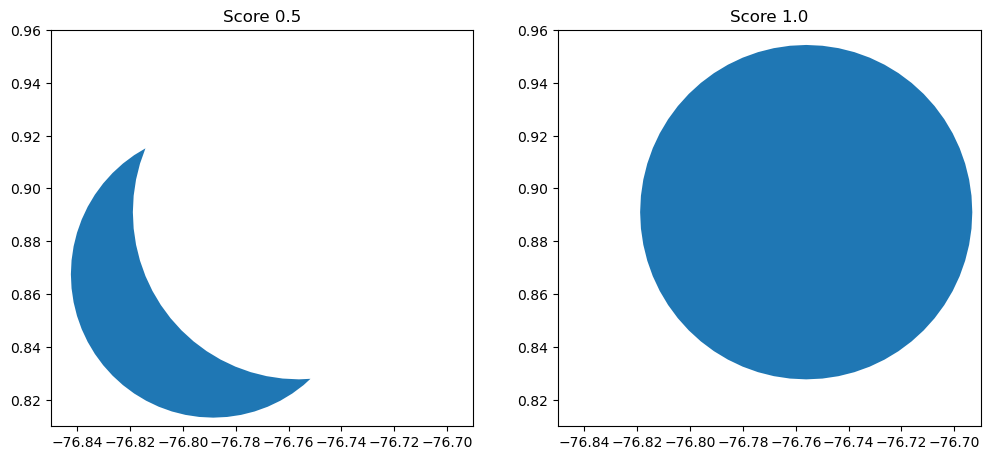

In [9]:
# just to visualize these geometries, we can pick a date and plot both scores
date = '2023-07-01'
print('Polygons for date: ', date)  
print('Displayed in separate plots for each score')
fig, ax = plt.subplots(1,2, figsize=(12,6))
daily_score.query(f'date == "{date}" and score == 0.5').plot(ax=ax[0])
daily_score.query(f'date == "{date}" and score ==  1').plot(ax=ax[1])
ax[0].set_xlim([-76.85, -76.69])
ax[0].set_ylim([0.81, 0.96])
ax[1].set_xlim([-76.85, -76.69])
ax[1].set_ylim([0.81, 0.96])
ax[0].set_title('Score 0.5')
ax[1].set_title('Score 1.0')
daily_score.query(f'date == "{date}"')

In [10]:
# now we can calculate the daily attribution for each plot_id-score-date combination
# the area_score is the area of the intersection of the score polygon and the plot polygon multiplied by the score
attribution = daily_attibution(daily_score, plots, obs_expanded, crs=6262)
attribution.head()

plot_id  POD  project_biodiversity  area_certifier     value  \
date                                                                      
2023-12-30      18  NaN                   NaN             NaN  platinum   
2023-12-30       3  NaN                   NaN             NaN  platinum   
2023-12-30       9  NaN                   NaN             NaN  platinum   
2023-12-30       9  NaN                   NaN             NaN      gold   
2023-12-29      18  NaN                   NaN             NaN  platinum   

            score  total_area  area_intersect  area_score   eco_id  
date                                                                
2023-12-30    1.0  142.034201      142.034201  142.034201  [11369]  
2023-12-30    1.0   64.834050       64.834050   64.834050  [11369]  
2023-12-30    1.0   10.096988        1.212471    1.212471  [11369]  
2023-12-30    1.0   10.096988        8.884515    8.884515  [11369]  
2023-12-29    1.0  142.034201      142.034201  142.034201  [11369]

In [11]:
# now we can compute the monthly attibution
# the monthly attribution is the sum of the area_score for each plot_id-month combination divided by 60
# calc_index is the plot_id-month combination
attr_month = monthly_attribution(attribution)
attr_month.head()

calc_index  calc_date  plot_id  POD  project_biodiversity  \
0  18-December-2023 2023-12-31       18  NaN                   NaN   
1   3-December-2023 2023-12-31        3  NaN                   NaN   
2   9-December-2023 2023-12-31        9  NaN                   NaN   
3   9-December-2023 2023-12-31        9  NaN                   NaN   
4  18-November-2023 2023-11-30       18  NaN                   NaN   

   area_certifier     value  total_area  credits_all     eco_id_list  \
0             NaN  platinum  142.034201   142.034201         [11369]   
1             NaN  platinum   64.834050    64.834050         [11369]   
2             NaN      gold   10.096988     8.884515         [11369]   
3             NaN  platinum   10.096988     1.212471         [11369]   
4             NaN  platinum  142.034201   142.034201  [10380, 11369]   

         eco_id  proportion_certified  credits_certified  credits_imrv  
0         11369                     1         142.034201           0.0  
1         11369                     1          64.834050           0.0  
2         11369                     1           8.884515           0.0  
3         11369                     1           1.212471           0.0  
4  10380, 11369                     1         142.034201           0.0

In [12]:
# now we can compute the cummulative attributions
attr_cumm = cummulative_attribution(attr_month, cutdays = 30, start_date=None)
attr_cumm.head()


Empty DataFrame
Columns: [plot_id, POD, project_biodiversity, area_certifier, value, first_date, last_date, total_area, credits_all, eco_id_list, eco_id, proportion_certified, credits_certified, credits_imrv]
Index: []

In [ ]:
# finally for visualization we can create a video called raindrops.mp4
daily_video(daily_score, plots, first_date=None)